In [1]:
import pandas as pd
import numpy as np

In [2]:
# Find the smallest missing data from the given list.
# 查找给定列表里的最小缺失值

l1 = [3, 4, -2, -1, 1, 5]  # Expected result: 0
l2 = [1, 3, 2, 0, 5, 4]  # Expected result: 6

def smallest_missing_data(given_list):
    list_sorted = sorted(given_list)
    min_data=list_sorted[0]
    while min_data in given_list:
        min_data += 1
    print(min_data)


# Answer
smallest_missing_data(l1)
smallest_missing_data(l2)

0
6


In [3]:
# Given the sales data, answer the questions.
data = pd.DataFrame(
    {
        "Product": [
            "Laptop",
            "Smartphone",
            "Tablet",
            "Smartwatch",
            "Laptop",
            "Smartphone",
            "Tablet",
            "Smartwatch",
            "Laptop",
            "Smartphone",
        ],
        "Category": [
            "Electronics",
            "Electronics",
            "Electronics",
            "Wearables",
            "Electronics",
            "Electronics",
            "Electronics",
            "Wearables",
            "Electronics",
            "Electronics",
        ],
        "Quantity": [1, np.nan, 1, 3, 1, 2, 1, 3, 1, 2],
        "Price_Per_Unit": [1500, 350, np.nan, 83.33, 1600, 400, 350, -33.33, 1800, 400],
        "Date": [
            "2023-01-01",
            "2023-01-02",
            "2023-01-08",
            "2023-01-15",
            "2023-01-16",
            "2023-02-01",
            "2023-02-02",
            "2023-02-03",
            "2023-02-04",
            "2023-02-05",
        ],
        "Target": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    }
)

data

,Product,Category,Quantity,Price_Per_Unit,Date,Target
0,Laptop,Electronics,1.0,1500.00,2023-01-01,0
1,Smartphone,Electronics,NaN,350.00,2023-01-02,1
2,Tablet,Electronics,1.0,NaN,2023-01-08,0
3,Smartwatch,Wearables,3.0,83.33,2023-01-15,1
4,Laptop,Electronics,1.0,1600.00,2023-01-16,0
5,Smartphone,Electronics,2.0,400.00,2023-02-01,1
6,Tablet,Electronics,1.0,350.00,2023-02-02,0
7,Smartwatch,Wearables,3.0,-33.33,2023-02-03,1
8,Laptop,Electronics,1.0,1800.00,2023-02-04,0
9,Smartphone,Electronics,2.0,400.00,2023-02-05,1


,Product,Category,Quantity,Price_Per_Unit,Date,Target
0,Laptop,Electronics,1.0,1500.00,2023-01-01,0
1,Smartwatch,Wearables,3.0,83.33,2023-01-15,1
2,Laptop,Electronics,1.0,1600.00,2023-01-16,0
3,Smartphone,Electronics,2.0,400.00,2023-02-01,1
4,Tablet,Electronics,1.0,350.00,2023-02-02,0
6,Laptop,Electronics,1.0,1800.00,2023-02-04,0
7,Smartphone,Electronics,2.0,400.00,2023-02-05,1


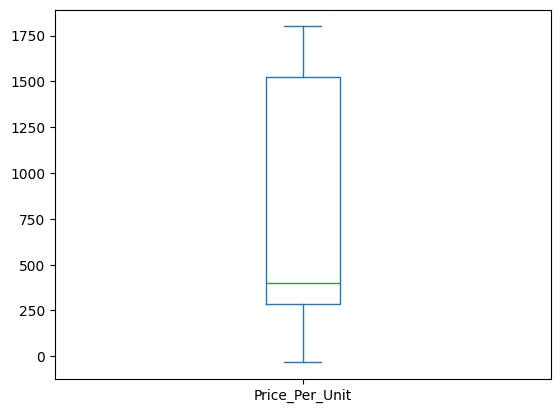

In [4]:
# Handle missing values and outliers
# Calculate the total sales of each product category
# Calculate the mean, median, and standard deviation of Price_Per_Unit
# Split a dataset into training and testing sets (80% train, 20% test)

# 处理缺失值和异常值
data = data.dropna().reset_index(drop=True)
data["Price_Per_Unit"].plot(kind="box", showfliers=True)
Q1 = data["Price_Per_Unit"].quantile(0.25)
Q3 = data["Price_Per_Unit"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
if lower_bound<0:
    lower_bound=0
upper_bound = Q3 + 1.5 * IQR

data = data[
    (data["Price_Per_Unit"] >= lower_bound) & (data["Price_Per_Unit"] <= upper_bound)
]
data

In [5]:
# 计算每个产品类别的总销售额
data_grouped = data.groupby("Category")
print(data_grouped["Quantity"].sum())

Category
Electronics    8.0
Wearables      3.0
Name: Quantity, dtype: float64


In [6]:
# 计算每单位价格的平均值、中位数和标准差
print(data_grouped['Price_Per_Unit'].mean())
print(data_grouped["Price_Per_Unit"].median())
print(data_grouped["Price_Per_Unit"].std())

Category
Electronics    1008.333333
Wearables        83.330000
Name: Price_Per_Unit, dtype: float64
Category
Electronics    950.00
Wearables       83.33
Name: Price_Per_Unit, dtype: float64
Category
Electronics    691.676707
Wearables             NaN
Name: Price_Per_Unit, dtype: float64


In [7]:
# 将数据集拆分为训练集和测试集（80% 训练，20% 测试）
from sklearn.model_selection import train_test_split
X=data[['Product','Category','Quantity','Price_Per_Unit','Date']]
y=data['Target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Product     Category  Quantity  Price_Per_Unit        Date
0      Laptop  Electronics       1.0         1500.00  2023-01-01
1  Smartwatch    Wearables       3.0           83.33  2023-01-15
3  Smartphone  Electronics       2.0          400.00  2023-02-01
4      Tablet  Electronics       1.0          350.00  2023-02-02
6      Laptop  Electronics       1.0         1800.00  2023-02-04
      Product     Category  Quantity  Price_Per_Unit        Date
2      Laptop  Electronics       1.0          1600.0  2023-01-16
7  Smartphone  Electronics       2.0           400.0  2023-02-05
0    0
1    1
3    1
4    0
6    0
Name: Target, dtype: int64
2    0
7    1
Name: Target, dtype: int64


In [8]:
# Find the longest increasing subsequence in a list.
# 在列表中找到最长的递增子序列

l1 = [10, 9, 15, 27, 7, 18, 108, 87]  # Expected result: [7, 18, 108]
l2 = [15, 21, 421, 14, 16, 91, 92, 93]  # Expected result: [14, 16, 91, 92, 93]


# Answer
def longest_increasing(given_list):
    increasing_list=[]
    start = 0
    for i in range(len(given_list)-1):
        if given_list[i]<given_list[i+1]:
            end=i+2
            increasing_list=given_list[start:end]
        else:
            start=i+1
            max_list = increasing_list
    if len(max_list)>len(increasing_list):
        print(max_list)
    else:
        print(increasing_list)


longest_increasing(l1)
longest_increasing(l2)

[7, 18, 108]
[14, 16, 91, 92, 93]


In [9]:
# Replace categories in a list based on specific conditions.
# 根据特定条件替换列表中的类别

categories = ["apple", "lettuce", "banana", "broccoli", "kiwi"]
mapping = {
    "apple": "Fruit",
    "banana": "Fruit",
    "kiwi": "Fruit",
    "lettuce": "Vegetable",
    "broccoli": "Vegetable",
}

# Answer
n=0
for i in categories:
    categorie=mapping[i]
    categories[n]=categorie
    n+=1
print(categories)


['Fruit', 'Vegetable', 'Fruit', 'Vegetable', 'Fruit']


In [10]:
# Replace categories that appear fewer times than a specified threshold with the label 'Other'.
# 将出现次数少于指定阈值的类别替换为“Other”

categories = ["salary", "policy", "address", "job", "salary", "address"]
threshold = 2

# Answer
from collections import Counter
counter=Counter(categories)
appear_items=counter.items()
ls_1=list()
for key,value in appear_items:
    if value>=2:
        ls_1.append(key)
for i in range(len(categories)):
    if categories[i] not in ls_1:
        categories[i]='Other'
print(categories)

['salary', 'Other', 'address', 'Other', 'salary', 'address']


In [11]:
# Generate all possible permutations of the characters in a string.
# 生成字符串中字符的所有可能排列

text = "abc"
# Expected result:['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

# Answer
from itertools import permutations
result=list(map(lambda x:''.join(x),permutations(text,3)))
print(result)
#len1=len(text)
#len2=len(result)


['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


In [12]:
# Remove all vowels(a, e, i, o, u) from a giving string.
# 在给定的字符串中移除(a, e, i, o, u)

text = "Python is a versatile programming language. It is widely used for web development, data analysis, and artificial intelligence."

# Answer
li_1=list(text)
n = ["a" , "e" , "i" , "o" , "u"]
for i in li_1:
    if i in n:
        li_1.remove(i)
li_1=''.join(li_1)
li_1

'Pythn s  vrstl prgrmmng lngg. It s wdly sd fr wb dvlpmnt, dt nlyss, nd artfcal ntllgnc.'